# 🚀 Week 02: Training Machine Learning Models 🎯  

This week, we dive deeper into **Machine Learning** by learning how to **train models** for different types of problems, including **classification** and **prediction** tasks. 🧠💡  

### What You’ll Learn:  
🔹 How to **train models** using real-world data.  
🔹 The role of **features** in improving predictions.  
🔹 How to **evaluate model performance** and fine-tune it.  
🔹 The impact of **hyperparameters** like learning rate and epochs.  

By the end of this week, you'll be able to build, train, and test models confidently. Get ready to experiment, analyze, and improve your models! 🚀🔥

## Exercise 01 : **Predicting Trip Fare using Linear Regression**  
---

### **Objective**  
The goal of this task is to build a machine learning model that predicts the fare price of a trip based on selected features. You will go through the full machine learning workflow, including data preprocessing, model training, evaluation, and visualization.  

### **Tasks Overview**  

Follow these steps to train and evaluate a machine learning model:  

1. **Load and Explore the Data** 📝  
2. **Prepare the Data** 🔧  
3. **Train the Model** 🎯  
4. **Make Predictions** 🔮  
5. **Evaluate the Model** 📊  

### **Resources**  
[A Visual Introduction To (Almost) Everything You Should Know](https://mlu-explain.github.io/linear-regression/)

---

###1.Load and Explore the Data 📝

Load the dataset using pandas and inspect its structure.
Check for missing values and basic statistics.
Visualize key features to understand their relationship with the target variable.

Dataset shape: (31694, 18)

First 5 rows:
    TRIP_START_TIMESTAMP     TRIP_END_TIMESTAMP  TRIP_START_HOUR  \
0  05/17/2022 7:15:00 AM  05/17/2022 7:45:00 AM             7.25   
1  05/17/2022 5:15:00 PM  05/17/2022 5:30:00 PM            17.25   
2  05/17/2022 5:15:00 PM  05/17/2022 5:30:00 PM            17.25   
3  05/17/2022 6:00:00 PM  05/17/2022 7:00:00 PM            18.00   
4  05/17/2022 5:00:00 PM  05/17/2022 5:30:00 PM            17.00   

   TRIP_SECONDS  TRIP_MILES  TRIP_SPEED  PICKUP_CENSUS_TRACT  \
0          2341        2.57         4.0                  NaN   
1          1074        1.18         4.0                  NaN   
2          1173        1.29         4.0         1.703132e+10   
3          3360        3.70         4.0         1.703132e+10   
4          1044        1.15         4.0         1.703132e+10   

   DROPOFF_CENSUS_TRACT  PICKUP_COMMUNITY_AREA  DROPOFF_COMMUNITY_AREA   FARE  \
0                   NaN                    NaN                    17.0  31.99   
1 

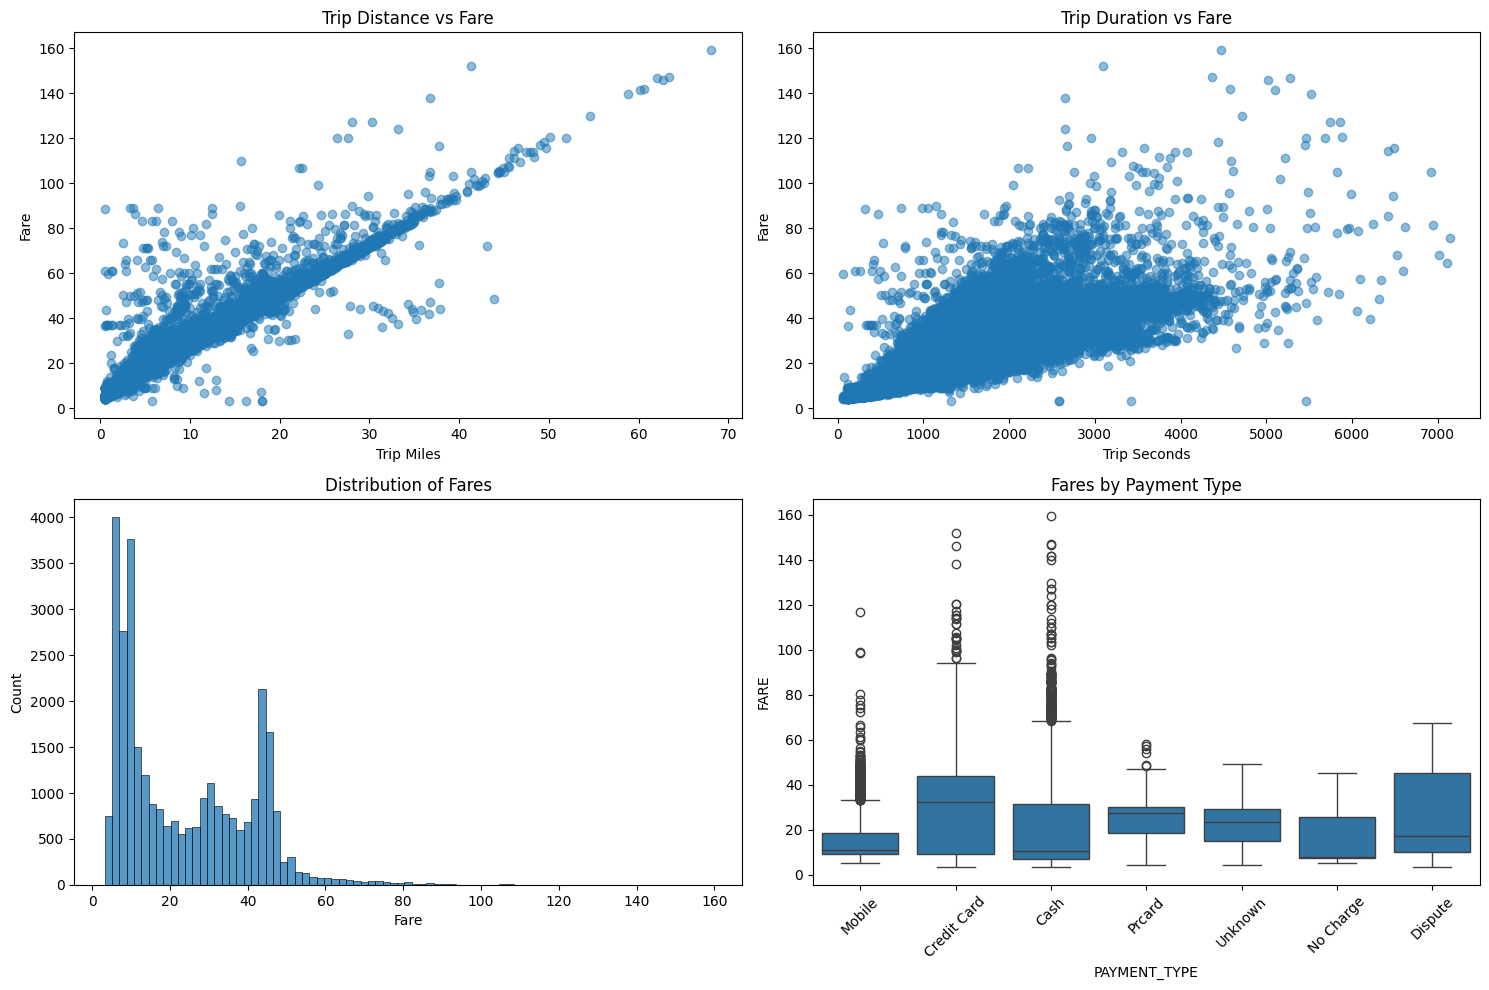

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
df = pd.read_csv("taxi_train.csv")

# Explore the data
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nData info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
print("\nStatistical summary:")
print(df.describe())

# Visualize relationships with fare
plt.figure(figsize=(15, 10))

# Plot 1: Trip distance vs fare
plt.subplot(2, 2, 1)
plt.scatter(df['TRIP_MILES'], df['FARE'], alpha=0.5)
plt.title('Trip Distance vs Fare')
plt.xlabel('Trip Miles')
plt.ylabel('Fare')

# Plot 2: Trip duration vs fare
plt.subplot(2, 2, 2)
plt.scatter(df['TRIP_SECONDS'], df['FARE'], alpha=0.5)
plt.title('Trip Duration vs Fare')
plt.xlabel('Trip Seconds')
plt.ylabel('Fare')

# Plot 3: Distribution of fares
plt.subplot(2, 2, 3)
sns.histplot(df['FARE'])
plt.title('Distribution of Fares')
plt.xlabel('Fare')

# Plot 4: Boxplot of fares by payment type
plt.subplot(2, 2, 4)
sns.boxplot(x='PAYMENT_TYPE', y='FARE', data=df)
plt.title('Fares by Payment Type')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



###2.Prepare the Data 🔧  
   - Select the most relevant features for training.  
   - Handle missing values if needed.  
   - Normalize or scale the data to improve performance if needed
   - Split the dataset into **training (80%)** and **testing (20%)** sets.  

>🙋 **Why we need to split our dataset**❓

In [2]:

# Data preparation
# Drop unnecessary columns and clean the data
columns_to_drop = [
    "TRIP_START_TIMESTAMP", "TRIP_END_TIMESTAMP", 
    "PICKUP_CENSUS_TRACT", "DROPOFF_CENSUS_TRACT", 
    "COMPANY", "TRIP_TOTAL", "TIPS", "TIP_RATE"
]
df_cleaned = df.drop(columns=columns_to_drop)

# Fill missing values
df_cleaned["PICKUP_COMMUNITY_AREA"] = df_cleaned["PICKUP_COMMUNITY_AREA"].fillna(-1)
df_cleaned["DROPOFF_COMMUNITY_AREA"] = df_cleaned["DROPOFF_COMMUNITY_AREA"].fillna(-1)

# Convert categorical variables
df_cleaned = pd.get_dummies(df_cleaned, columns=["PAYMENT_TYPE"], drop_first=True)

# Extract features and target
X = df_cleaned.drop(columns=["FARE"])
y = df_cleaned["FARE"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### 3. Train the Model 🎯  

Train a **linear regression model** using `sklearn` (you can also try other alternatives).  

🔧 **Experiment with Different Features**  
- Start with a few features and observe the model's performance.  
- Try adding or removing features to see how it affects accuracy.  

> 🙋 **What are hyperparameters, and how do learning rate and epochs affect training** ❓

> 🙋 **Does using more features always improve the model** ❓

In [3]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)




LinearRegression()

#### 🎉 Congratulations! 🎉

**🚀You’ve just trained your first Machine Learning model! 🚀**

### 4. Make Predictions 🔮  

Use the trained model to predict values on the **testing data**.  
Compare the predictions with the actual values to assess accuracy.  
You can also try making predictions on the **training data** to see how well the model memorized the patterns.  

>🙋 **Why doesn’t the model predict exact values, even when using the training data**❓

In [4]:
# Make predictions
y_pred = model.predict(X_test_scaled)



###5.Evaluate the Model 📊

Measure performance using metrics like MSE, RMSE, and R² Score.
Plot a loss curve to track training progress.
Create a scatter plot to compare actual vs. predicted values.

>🙋 **What do MSE, RMSE, and R² Score tell us about the model's performance**❓

>🙋 **How can you tell if your model is overfitting or underfitting**❓



Model Evaluation:
Mean Absolute Error: $1.24
Root Mean Squared Error: $3.57
R² Score: 0.9569


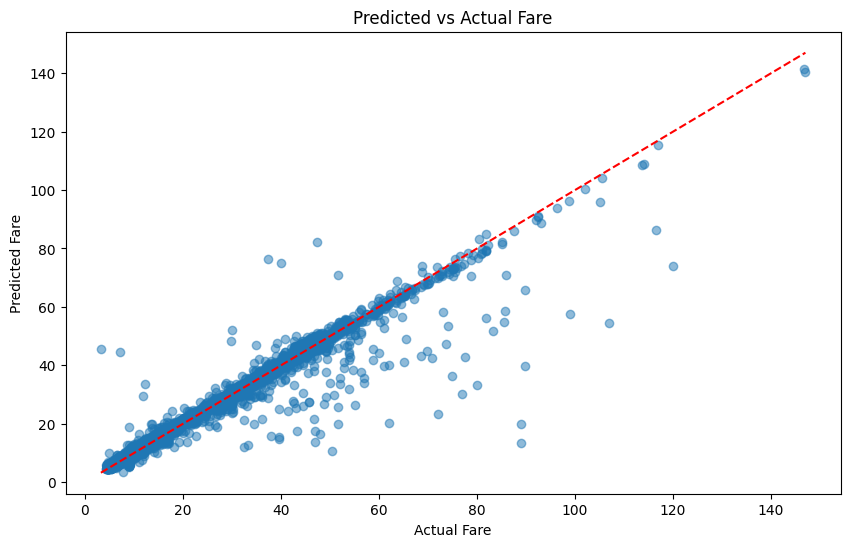

In [5]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Absolute Error: ${mae:.2f}")
print(f"Root Mean Squared Error: ${rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Predicted vs Actual Fare')
plt.show()

---
## Exercise 02 : **University Admission Prediction Challenge**

😇 I know that the exercise is difficult, but you will practice what you learned last week along with your first classification algorithm.

### 🎯 Objective

Your mission is to predict whether a student will be admitted to their desired university based on various academic and application-related factors. You’ll use **Logistic Regression** to build a predictive model and discuss its strengths and limitations.

📊 The Dataset  :

[Admission_Predict.csv](https://github.com/1337-Artificial-Intelligence/Entry-Level-ML-Engineer-Bootcamp/blob/main/Week02/Admission_Prediction_Challenge.csv)

The dataset contains information on **400 students** with the following attributes:

- **GRE Score** 🎓
- **TOEFL Score** 📚
- **University Rating** 🏛️
- **Statement of Purpose (SOP) Score** ✍️
- **Letter of Recommendation (LOR) Score** 📩
- **Cumulative Grade Point Average (CGPA)** 🎯
- **Research Experience (Yes/No)** 🔬
- **Chance of Admission (Target Variable: 0 or 1)**

### 🛠️ Steps to Follow

1. **Load & Explore the Data**: Understand the dataset, check for missing values, and analyze distributions.
2. **Feature Selection & Processing**: Identify relevant features and scale them if needed.
3. **Train a Logistic Regression Model**: Implement Logistic Regression (**from scratch** optional) to classify students into "Admitted" or "Not Admitted."
4. **Evaluate the Model**: Measure accuracy, precision, recall, and other key metrics.(do some reaserch 🙂)
5. **Discuss Limitations**: Explore cases where Logistic Regression may struggle and suggest improvements (e.g., feature engineering, alternative models).

### **Resources**  
[Logistic Regression](https://mlu-explain.github.io/logistic-regression/)

### 🎨 Bonus: Visual Exploration

Use **histograms, correlation heatmaps, and scatter plots** to gain insights before modeling.

🔎 **Can you build a model that accurately predicts student admissions?** Let's find out! 🚀

Dataset shape: (400, 9)

First 5 rows:
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  

Admission status distribution:
Admitted
1    367
0     33
Name: count, dtype: int64

Statistical summary:
       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000   

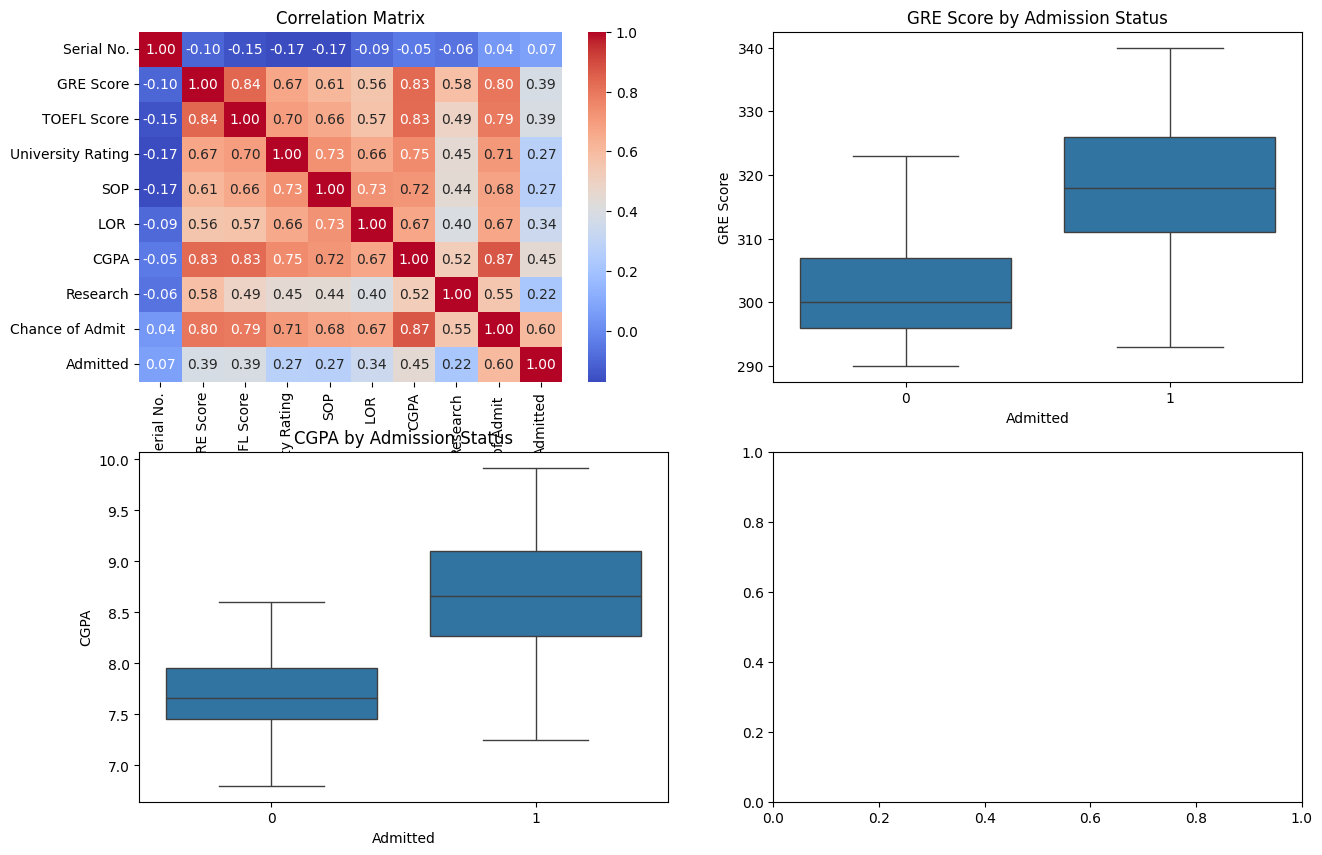

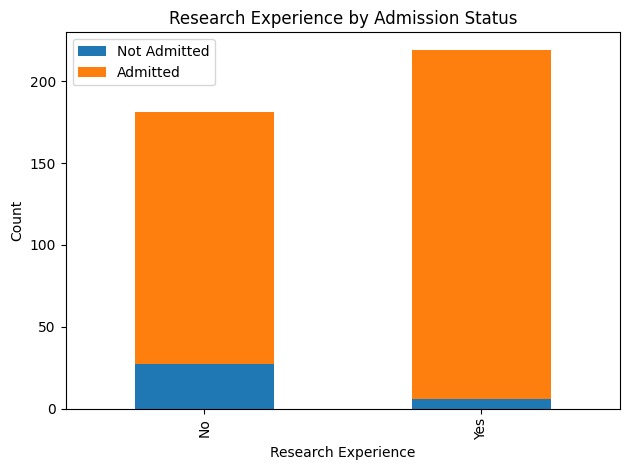


Model Evaluation:
Accuracy: 0.9375
Precision: 0.9333
Recall: 1.0000
F1 Score: 0.9655
AUC: 0.9286


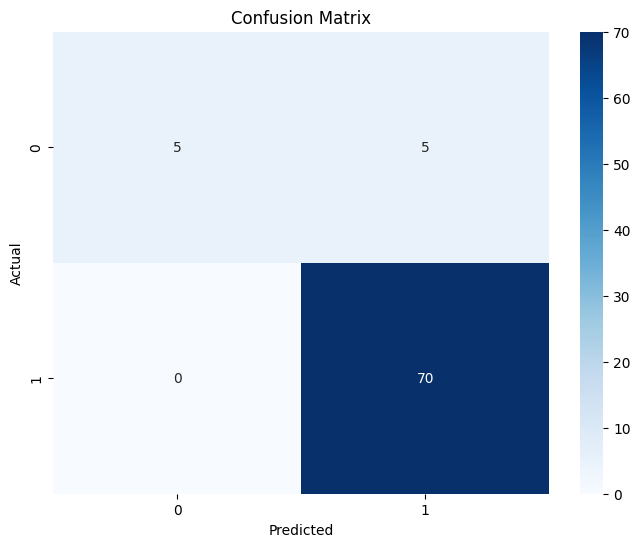


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.93      1.00      0.97        70

    accuracy                           0.94        80
   macro avg       0.97      0.75      0.82        80
weighted avg       0.94      0.94      0.93        80



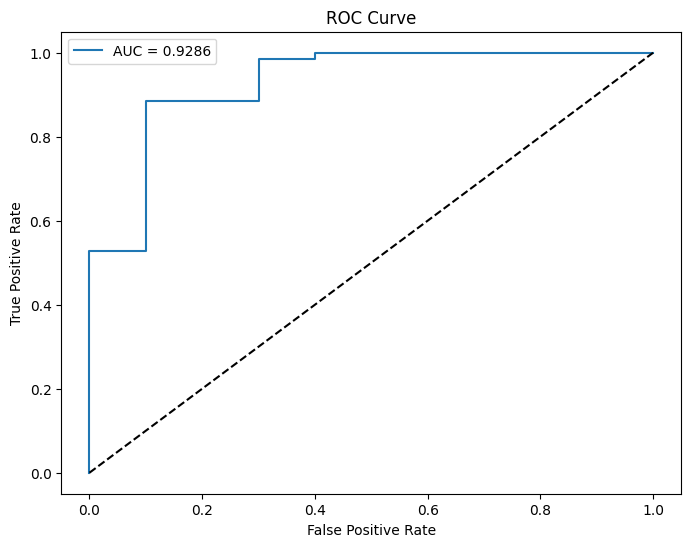

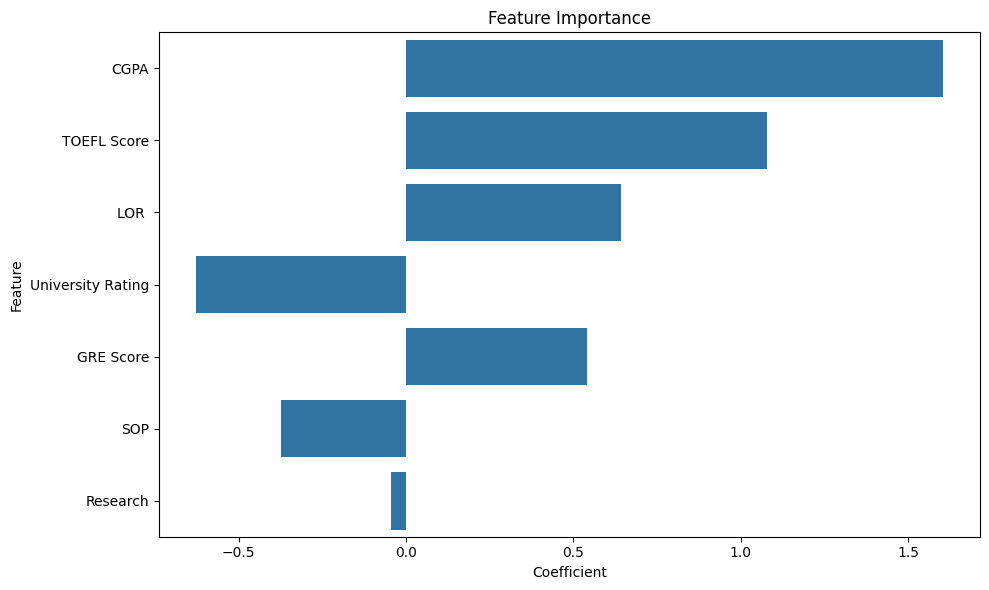

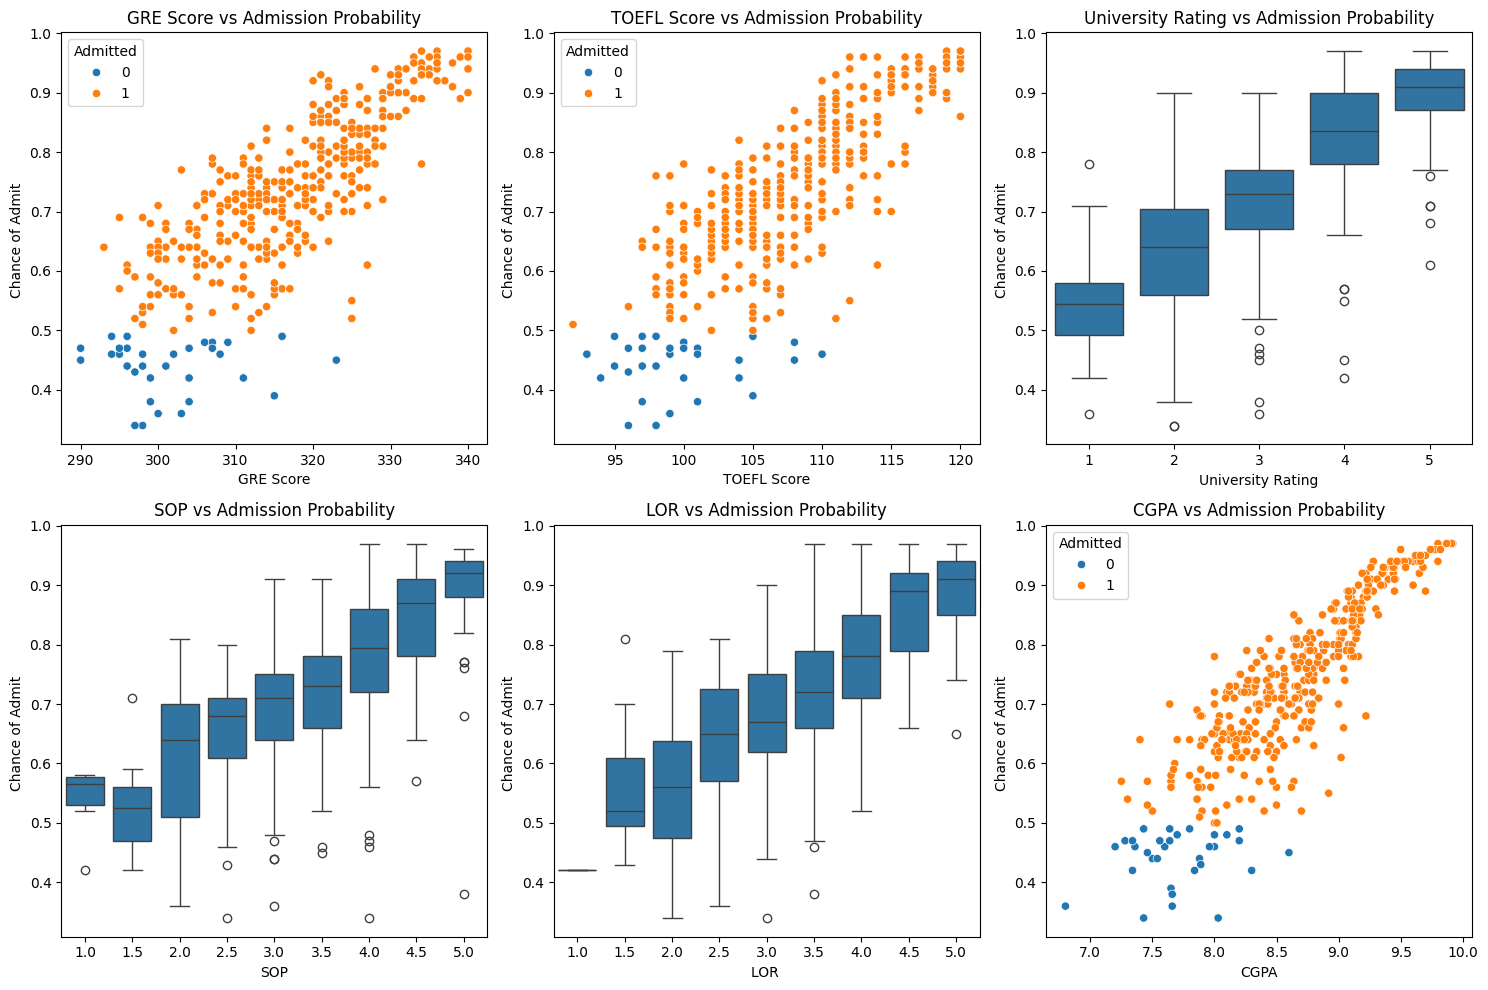


New Student Prediction:
Probability of Admission: 0.9955
Prediction: Admitted


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Load the data
df = pd.read_csv("Admission_Prediction_Challenge.csv")

# Explore the data
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

# Create the binary admission target
# Using the exact column name with trailing space
df['Admitted'] = (df['Chance of Admit '] >= 0.5).astype(int)
print("\nAdmission status distribution:")
print(df['Admitted'].value_counts())

# Basic statistics
print("\nStatistical summary:")
print(df.describe())

# Visualize relationships
plt.figure(figsize=(15, 10))

# Plot 1: Correlation heatmap
plt.subplot(2, 2, 1)
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

# Plot 2: GRE scores by admission status
plt.subplot(2, 2, 2)
sns.boxplot(x='Admitted', y='GRE Score', data=df)
plt.title('GRE Score by Admission Status')

# Plot 3: CGPA by admission status
plt.subplot(2, 2, 3)
sns.boxplot(x='Admitted', y='CGPA', data=df)
plt.title('CGPA by Admission Status')

# Plot 4: Research experience by admission status
plt.subplot(2, 2, 4)
df_counts = df.groupby(['Research', 'Admitted']).size().unstack()
df_counts.plot(kind='bar', stacked=True)
plt.title('Research Experience by Admission Status')
plt.xlabel('Research Experience')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(['Not Admitted', 'Admitted'])

plt.tight_layout()
plt.show()

# Data preparation
# Extract features and target
# Exclude Serial No. and the target columns
X = df.drop(columns=['Serial No.', 'Admitted', 'Chance of Admit '])
y = df['Admitted']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Feature importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
coefficients = coefficients.sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# Let's also look at how different features relate to admission probability
plt.figure(figsize=(15, 10))

# Plot 1: GRE Score vs Admission Probability
plt.subplot(2, 3, 1)
sns.scatterplot(x='GRE Score', y='Chance of Admit ', hue='Admitted', data=df)
plt.title('GRE Score vs Admission Probability')

# Plot 2: TOEFL Score vs Admission Probability
plt.subplot(2, 3, 2)
sns.scatterplot(x='TOEFL Score', y='Chance of Admit ', hue='Admitted', data=df)
plt.title('TOEFL Score vs Admission Probability')

# Plot 3: University Rating vs Admission Probability
plt.subplot(2, 3, 3)
sns.boxplot(x='University Rating', y='Chance of Admit ', data=df)
plt.title('University Rating vs Admission Probability')

# Plot 4: SOP vs Admission Probability
plt.subplot(2, 3, 4)
sns.boxplot(x='SOP', y='Chance of Admit ', data=df)
plt.title('SOP vs Admission Probability')

# Plot 5: LOR vs Admission Probability
plt.subplot(2, 3, 5)
sns.boxplot(x='LOR ', y='Chance of Admit ', data=df)
plt.title('LOR vs Admission Probability')

# Plot 6: CGPA vs Admission Probability
plt.subplot(2, 3, 6)
sns.scatterplot(x='CGPA', y='Chance of Admit ', hue='Admitted', data=df)
plt.title('CGPA vs Admission Probability')

plt.tight_layout()
plt.show()

# Prediction for new students (example)
new_student = pd.DataFrame({
    'GRE Score': [320],
    'TOEFL Score': [110],
    'University Rating': [4],
    'SOP': [4.5],
    'LOR ': [4.0],  # Note the space in column name
    'CGPA': [8.8],
    'Research': [1]
})

# Scale the features
new_student_scaled = scaler.transform(new_student)

# Make prediction
admission_prob = model.predict_proba(new_student_scaled)[0, 1]
admission_result = 'Admitted' if admission_prob >= 0.5 else 'Not Admitted'

print("\nNew Student Prediction:")
print(f"Probability of Admission: {admission_prob:.4f}")
print(f"Prediction: {admission_result}")

---
##🎉 **Congratulations!** 🎉  

You've successfully trained your first **Linear Regression** and **Logistic Regression** models! 🚀  

Through this journey, you've learned:  
✅ How to **prepare and preprocess data** for training.  
✅ The importance of **choosing the right features** and tuning **hyperparameters**.  
✅ How to **train, predict, and evaluate models** using key metrics.  
✅ The difference between **regression (predicting continuous values)** and **classification (predicting categories)**.  

This is a **big step** in your Machine Learning journey! 💡 But ML is much more than just linear and logistic regression—there are many other models and techniques to explore.  

🔎 **Next Challenge:**  
- Research other **types of ML models** (e.g., Decision Trees, SVMs, Neural Networks).  
- Try solving different **real-world problems** using what you've learned.  

👏 Keep experimenting, keep learning, and welcome to the world of Machine Learning! 🚀🔥